In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
%matplotlib inline

In [2]:
df = pd.read_csv('tcc2.csv', sep=';', encoding='ISO-8859-1')

FileNotFoundError: File b'tcc2.csv' does not exist

In [25]:
col = df.columns
df.shape

(899, 99)

In [26]:
def is888(x):
    if x == 888:
        return np.nan
    else:
        return x

In [27]:
for val in col: 
    df[val] = df[val].apply(lambda x: is888(x))

In [6]:
#df = df.dropna()

In [28]:
df.shape

(899, 99)

In [32]:
x = df.corr(method='spearman', min_periods=5)
x.head()

,prevas axial,prevas radicular,aosw1,aosw2,aosw3,aosw4,aosw5,aosw6,aosw7,aosw8,...,afab7,afab8,afab9,afab10,afab11,afab12,afab13,afab14,afab15,afab16
prevas axial,1.000000,-0.340797,0.141532,0.077367,0.086592,0.049217,0.051952,0.096922,0.071556,0.046494,...,0.037932,0.033656,0.068682,0.085516,0.104181,0.032030,0.053359,0.081964,0.120546,0.079033
prevas radicular,-0.340797,1.000000,0.199995,0.196762,0.095792,0.168284,0.144250,0.151504,0.132485,0.226747,...,0.005268,0.002978,-0.017536,-0.022211,-0.033604,0.077689,0.076528,0.090249,-0.019120,-0.011897
aosw1,0.141532,0.199995,1.000000,0.366005,0.295511,0.358159,0.293443,0.367771,0.398289,0.380821,...,0.106811,0.092700,0.083338,0.120924,0.102664,0.153167,0.234238,0.211138,0.137523,0.142743
aosw2,0.077367,0.196762,0.366005,1.000000,0.372110,0.379647,0.307428,0.320018,0.254845,0.366568,...,0.089239,0.117963,0.095774,0.075180,0.086134,0.154066,0.141609,0.183216,0.101902,0.133850
aosw3,0.086592,0.095792,0.295511,0.372110,1.000000,0.314381,0.261578,0.338406,0.187741,0.298756,...,0.037159,0.031312,0.048272,0.045598,0.039913,0.083366,0.137475,0.153964,0.084845,0.077879


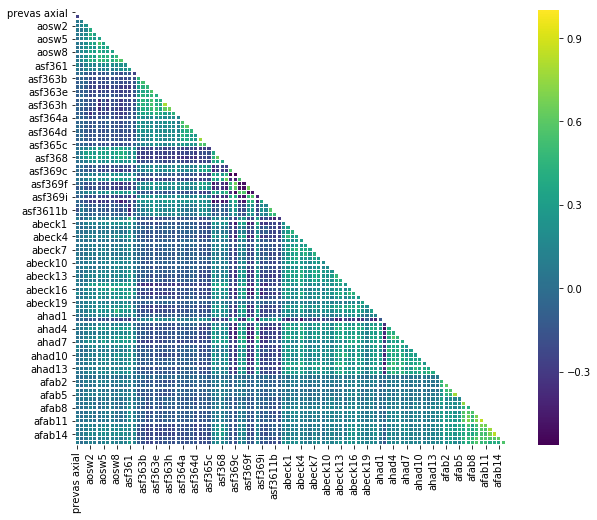

In [33]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='viridis', annot=False, linewidths=0.2 , square=True, mask=mask)
plt.show()

In [34]:
altas = []
for i in range(99):
    for z in range(i, 99):
        if x.iloc[i][z] >= 0.7 and i != z:
            printmd("**alta correlação**")
            print(x.columns[i])
            print(x.index.values[z])
            item = [x.columns[i], x.index.values[z]]
            altas.append(item)

**alta correlação**

asf363g
asf363h


**alta correlação**

asf365a
asf365b


**alta correlação**

afab4
afab5


**alta correlação**

afab6
afab7


**alta correlação**

afab7
afab11


**alta correlação**

afab9
afab10


**alta correlação**

afab9
afab11


**alta correlação**

afab10
afab11


**alta correlação**

afab12
afab13


**alta correlação**

afab13
afab14


In [35]:
negativas = []
for i in range(99):
    for z in range(i, 99):
        if x.iloc[i][z] <= -0.5 and i != z:
            printmd("**correlação negativa**")
            print(x.columns[i])
            print(x.index.values[z])
            item = [x.columns[i], x.index.values[z]]
            negativas.append(item)

**correlação negativa**

asf366
asf3610


**correlação negativa**

asf369b
asf369d


**correlação negativa**

asf369c
asf369d


**correlação negativa**

asf369c
asf369h


**correlação negativa**

asf369d
asf369f


**correlação negativa**

asf369e
asf369f


**correlação negativa**

asf369e
asf369g


**correlação negativa**

asf369f
asf369h


**correlação negativa**

abeck4
ahad2


**correlação negativa**

ahad2
ahad4


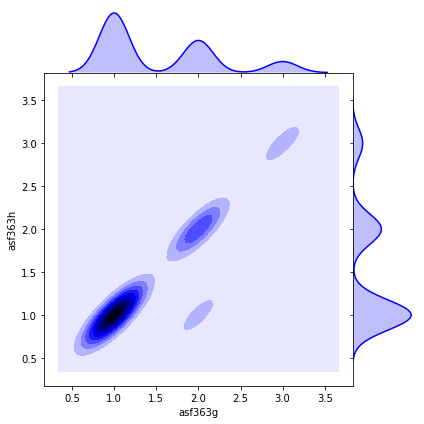

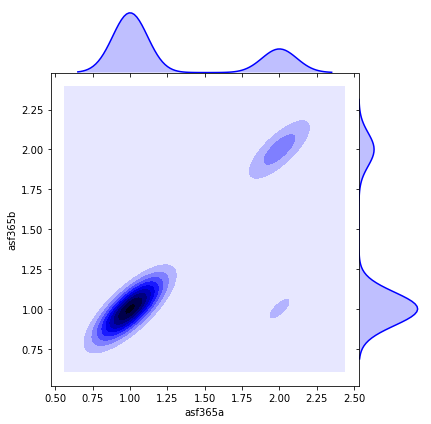

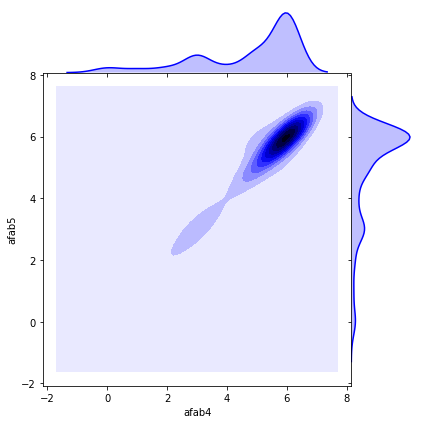

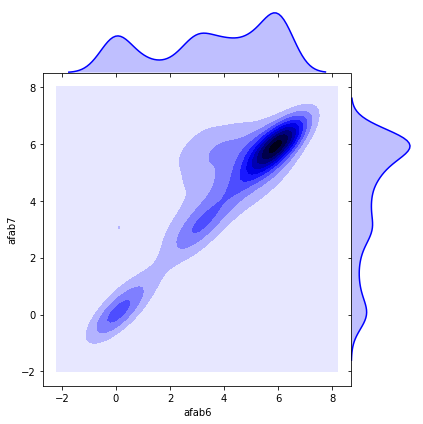

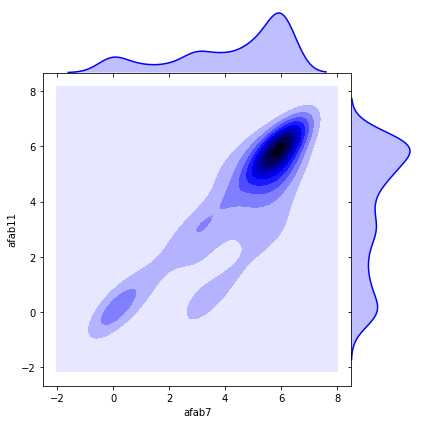

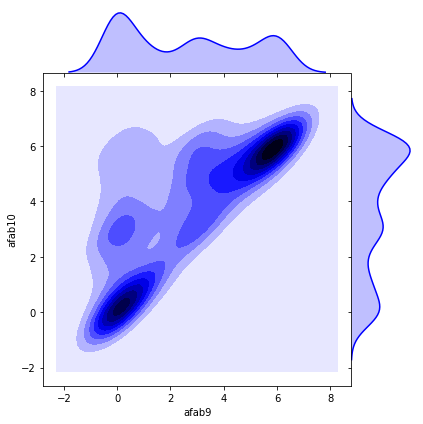

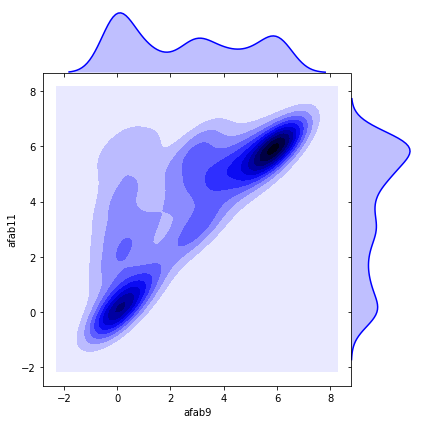

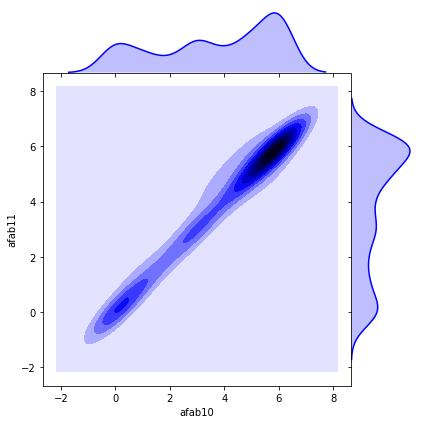

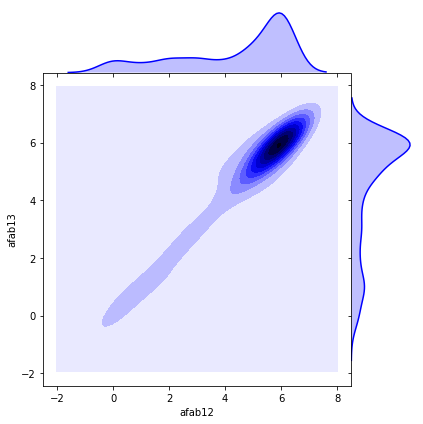

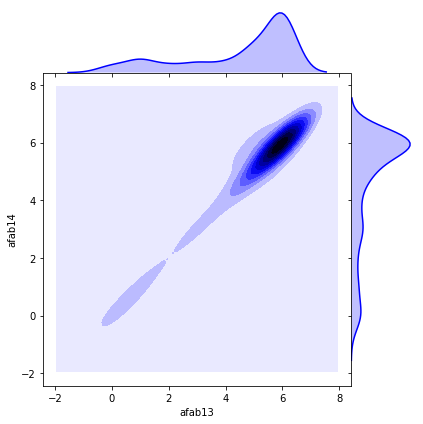

In [36]:
for par in altas:
    sns.jointplot(par[0], par[1], data=df, kind = "kde", space = 0, color = "b")
    plt.show()

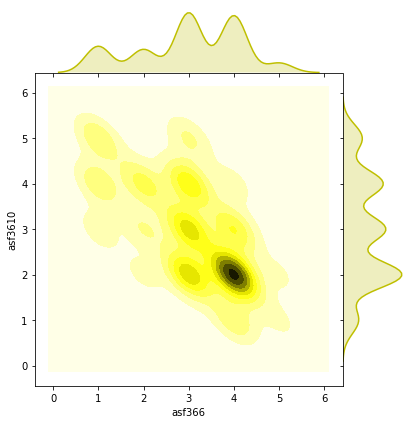

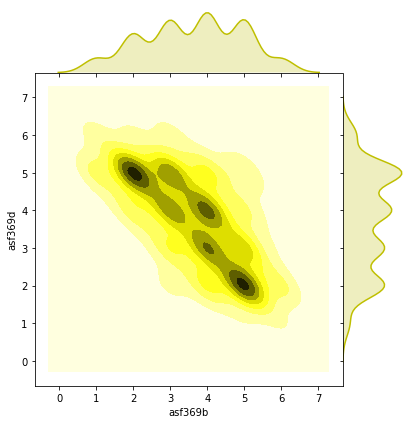

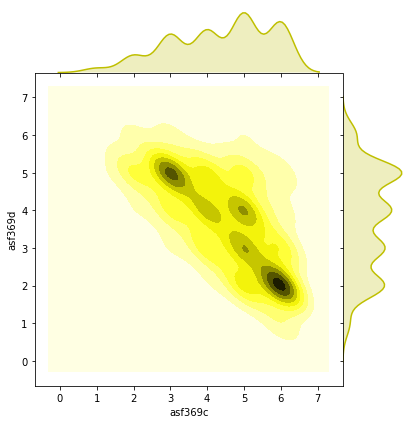

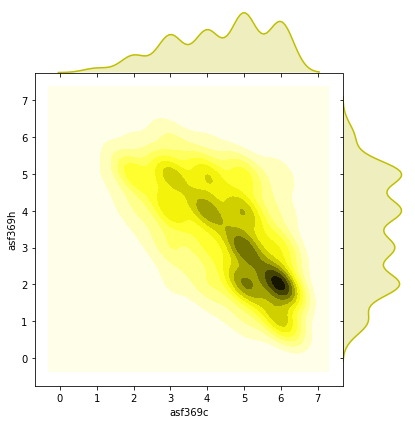

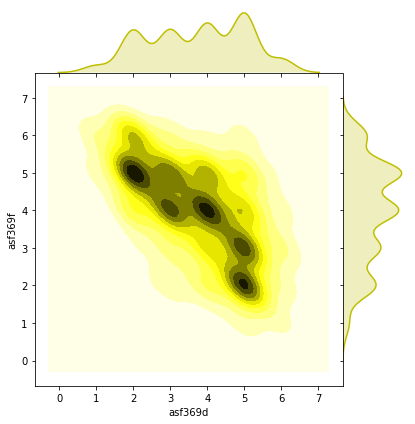

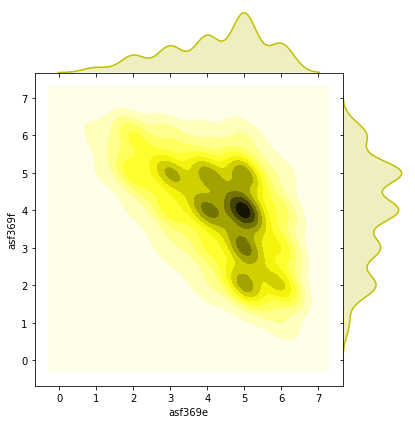

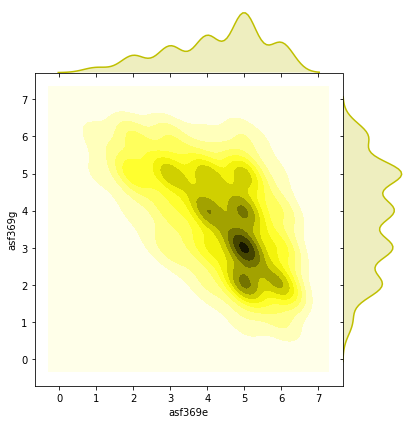

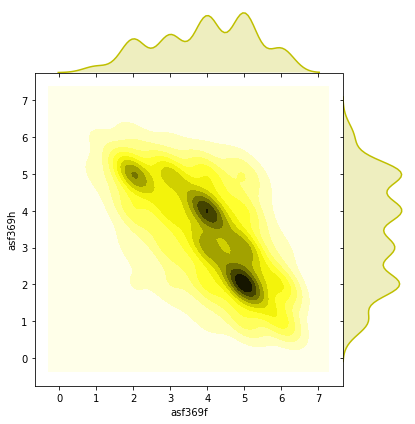

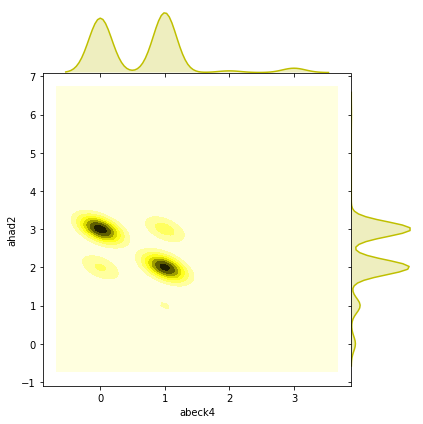

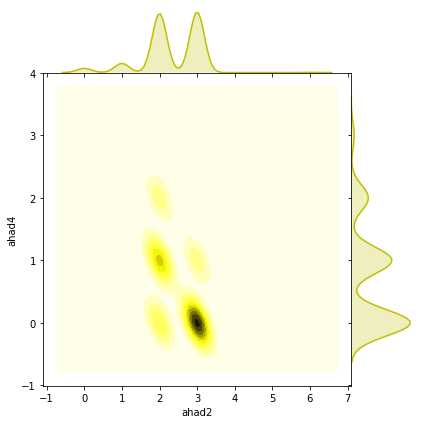

In [37]:
for par in negativas:
    sns.jointplot(par[0], par[1], data=df, kind = "kde", space = 0, color = "y")
    plt.show()